In [624]:
library("phyloseq"); packageVersion("phyloseq")
library("ggplot2"); packageVersion("ggplot2")
library("ape"); packageVersion("ape")
library("vegan"); packageVersion("vegan")
library(dplyr)
library(scales)
library(grid)
library(reshape2)
library("edgeR")
library("plyr")

[1] ‘1.22.3’

[1] ‘3.1.0’

[1] ‘5.1’

[1] ‘2.5.3’

In [811]:
SV <- read.table("/Users/anthonybonacolta/Desktop/Nvec_16s/export_Nvec/feature-tableNvec_new.txt", 
                 row.names = 1, header = TRUE)

In [812]:
SV <- t(tSV)

In [813]:
head(SV)

,882b5b49ef18215727a0900958cdec5d,9c85a7c3df8f897f7f7384d6ee69795a,aa0426fd223e077ce623956d8f030283,b8c545c99dea06d010eb0bf2c6572d1c,a7da93a9744a7863292bcf97d47b6a10,1cb921ab8e1f9c8fc61d19cc69a27d40,af050ab6cd38e20acfc4ad845600b6c6,945184b6386c192c0066e0a98a154780,ac830fdc2bf50579a08f5cc596496327,e6002c09a2736cf21f94531e53968303,⋯,b50cce7ae71e62a96fc9b1926758ae1b,3481fa43fe5fba6aecdc7f9aae6ed9c0,56c04e570a329312294086d22276dae1,9e3e61ab8f8501e49dfd6f9a0af91d14,cd9401a6bce4a63af516d06d2a843f9d,120ce894fb7a289ec5fab1eca067d03e,8ce12e88f6b59bb09494567f0d678092,5a14b78c859e9409e0e18d55a81a2ffe,886813d6c66ef41ef648c9b92ffde619,a4f02ce3afe8081b6881230b3fb3c3c5
NV10C,0,0,0,0,0,0,30,0,0,0,⋯,0,0,0,0,0,0,9,0,11,0
NV10M,0,0,11,0,0,0,16,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NV10P,4,0,17,0,0,23,61,0,0,0,⋯,0,0,0,0,0,303,0,4,0,0
NV11C,22,0,0,0,19,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,128,0
NV11M,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NV11P,3,0,0,0,7,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,7,0


In [814]:
tax <-as.matrix(read.table("/Users/anthonybonacolta/Desktop/Nvec_16s/export_Nvec/tax-no-MitoChNvec_ps.txt",  
                           row.names = 1, header = FALSE, sep = "\t"))
head(tax)

,V2,V3,V4,V5,V6,V7,V8
01046b2aadb9fd70ce8b0edaa494169a,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Terasakiellaceae,uncultured,
010b6f66e86eee40b0e90678a0ba5a83,Bacteria,Planctomycetes,Phycisphaerae,Phycisphaerales,Phycisphaeraceae,Phycisphaera,
025193fb05e71620045ebb00ebd5fa37,Bacteria,Proteobacteria,Deltaproteobacteria,NB1-j,,,
0356b8bf9fd15d2b45124228f1e8a464,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Devosiaceae,Devosia,
03c3f2527a8912c5312975670dd2b2b0,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Hyphobacterium,
03ff409687c3813261924a6f629fff78,Bacteria,Nitrospirae,Nitrospira,Nitrospirales,Nitrospiraceae,Nitrospira,


In [815]:
head(tax)

,V2,V3,V4,V5,V6,V7,V8
01046b2aadb9fd70ce8b0edaa494169a,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Terasakiellaceae,uncultured,
010b6f66e86eee40b0e90678a0ba5a83,Bacteria,Planctomycetes,Phycisphaerae,Phycisphaerales,Phycisphaeraceae,Phycisphaera,
025193fb05e71620045ebb00ebd5fa37,Bacteria,Proteobacteria,Deltaproteobacteria,NB1-j,,,
0356b8bf9fd15d2b45124228f1e8a464,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Devosiaceae,Devosia,
03c3f2527a8912c5312975670dd2b2b0,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Hyphobacterium,
03ff409687c3813261924a6f629fff78,Bacteria,Nitrospirae,Nitrospira,Nitrospirales,Nitrospiraceae,Nitrospira,


In [816]:
tree_file <-read_tree("/Users/anthonybonacolta/Desktop/Nvec_16s/export_Nvec/tree.nwk")

In [817]:
head(tree_file)

645,646
646,1
646,647
647,2
647,648
648,649
649,3
649,4
648,5
645,650
650,651


In [818]:
colnames(tax) <- c ("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")

In [819]:
tax[tax==""] <- NA
head(tax)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
01046b2aadb9fd70ce8b0edaa494169a,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Terasakiellaceae,uncultured,NA
010b6f66e86eee40b0e90678a0ba5a83,Bacteria,Planctomycetes,Phycisphaerae,Phycisphaerales,Phycisphaeraceae,Phycisphaera,NA
025193fb05e71620045ebb00ebd5fa37,Bacteria,Proteobacteria,Deltaproteobacteria,NB1-j,NA,NA,NA
0356b8bf9fd15d2b45124228f1e8a464,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Devosiaceae,Devosia,NA
03c3f2527a8912c5312975670dd2b2b0,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Hyphobacterium,NA
03ff409687c3813261924a6f629fff78,Bacteria,Nitrospirae,Nitrospira,Nitrospirales,Nitrospiraceae,Nitrospira,NA


In [775]:
map <- read.table("/Users/anthonybonacolta/Desktop/Nvec_16s/16S_metadata_tab_phyloseq.txt",
                  sep ="\t", row.names = 1, header = TRUE)
head(map)


,Sample,Tissue,Species
NV4M,NV4-M,mesenteries,nematostella_vectensis
NV4C,NV4-C,capitulum,nematostella_vectensis
NV4P,NV4-P,physa,nematostella_vectensis
NV5M,NV5-M,mesenteries,nematostella_vectensis
NV5C,NV5-C,capitulum,nematostella_vectensis
NV5P,NV5-P,physa,nematostella_vectensis


In [636]:
Sv1 <- t(SV)
Sv2 <- Sv1[ order(row.names(Sv1)), ]
Sv2 <-t(Sv2)
head(Sv2)

,01046b2aadb9fd70ce8b0edaa494169a,010b6f66e86eee40b0e90678a0ba5a83,025193fb05e71620045ebb00ebd5fa37,0356b8bf9fd15d2b45124228f1e8a464,03c3f2527a8912c5312975670dd2b2b0,03ff409687c3813261924a6f629fff78,0429a8a999c3238e12bbfaa1714d385e,04b69c044f7c9e3d63af98b19bbb58eb,051adce2c6b7c31058bb38596901ab6b,0547d3b2c25b26247ccefcfec5c6921e,⋯,f936cc0095df2ce79b485df5f7fe631a,fa220cab013c6b06429274c500f37c9e,fa96cbd7b2df953f48e159b78c51527d,fb5b56e654c665d194adf557166fbb85,fcc5e8d7f1186953f91a80571779233d,fd2eb1fe2266eed160a855f715f7c77e,fd496fd32dc8c08ade2e8b6c9d8ee13d,fd98346394a5c79e554003012cb33826,fdcf994bf2f544a2ff3fe906dd06664b,fe037094f4e4d88606f217b5c3d1f59c
NV10C,0,7,0,0,0,0,152,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NV10M,216,12,0,10,0,0,219,7,0,13,⋯,6,0,0,0,0,0,0,0,0,7
NV10P,161,21,52,51,20,153,23,113,129,102,⋯,7,0,0,46,66,0,0,0,0,628
NV11C,0,26,0,0,0,0,148,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
NV11M,0,0,0,0,0,0,365,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NV11P,27,4,0,17,0,0,431,153,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [656]:
ps = phyloseq(otu_table(SV, taxa_are_rows=FALSE), 
               sample_data(map), 
               tax_table(tax),
                 phy_tree(tree_file))

In [657]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 620 taxa and 19 samples ]
sample_data() Sample Data:       [ 19 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 620 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 620 tips and 619 internal nodes ]

In [669]:
ord.PCoA.brayP <- ordinate(ps, method="PCoA", distance="bray")

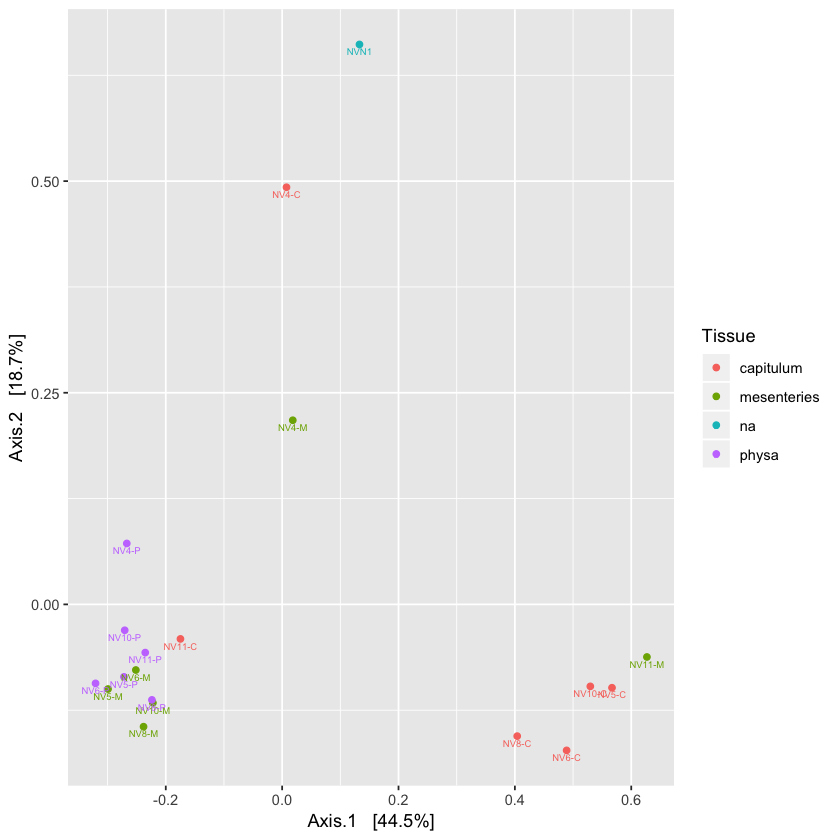

In [671]:
plot_ordination(ps, ord.PCoA.brayP, color="Tissue", label = "Sample")

In [672]:
PCoATissueWneg <- plot_ordination(ps, ord.PCoA.brayP, color="Tissue", label = "Sample")

In [678]:
jpeg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/PCoATissueWneg.jpeg")
plot(PCoATissueWneg)
dev.off()

pdf 
  2

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

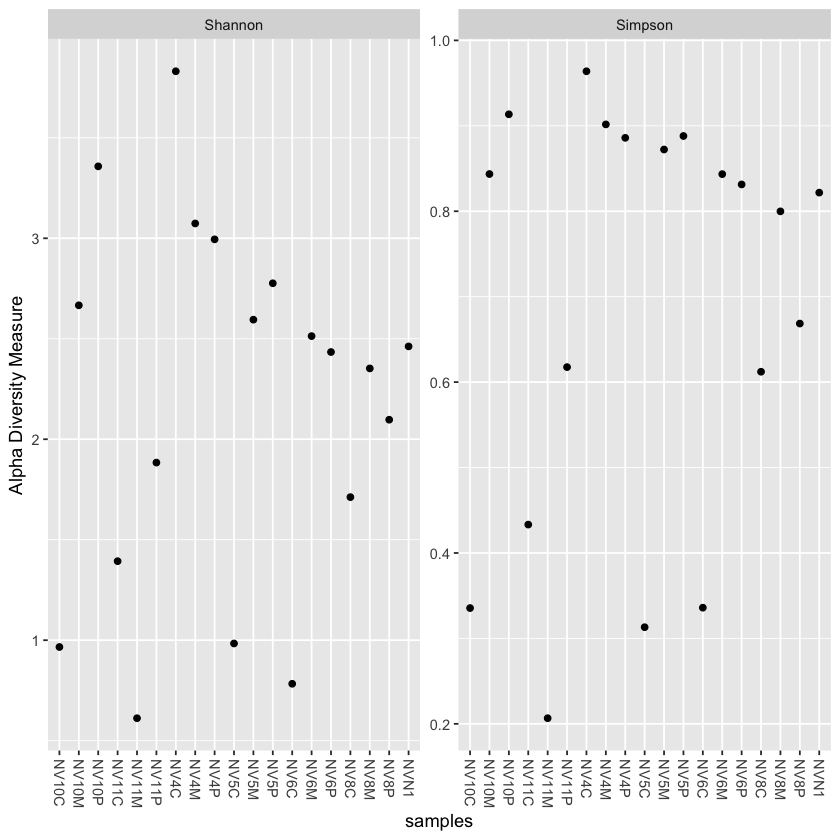

In [682]:
plot_richness(ps, measures=c("Simpson", "Shannon"))

In [683]:
SimpShan <- plot_richness(ps, measures=c("Simpson", "Shannon"))

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

In [685]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/SimpShan.svg")
plot(SimpShan)
dev.off()

pdf 
  2

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

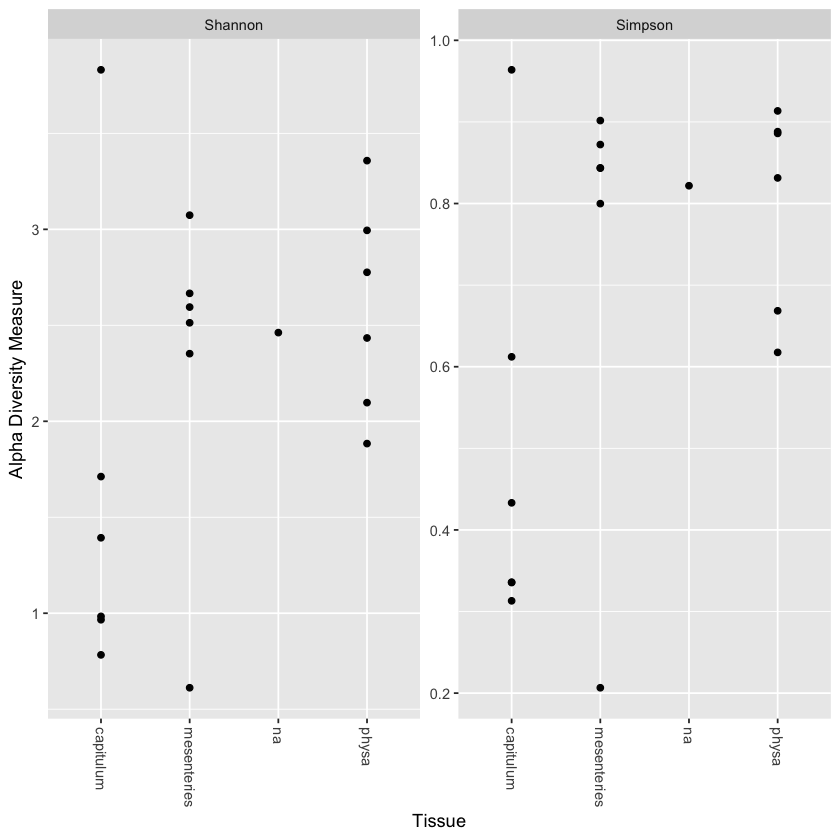

In [687]:
plot_richness(ps, x="Tissue", measures=c("Simpson", "Shannon"))

In [688]:
map_noneg <- read.table("/Users/anthonybonacolta/Desktop/Nvec_16s/16S_metadata_tab_phyloseq_NoNeg.txt",
                  sep ="\t", row.names = 1, header = TRUE)
head(map)

,Sample,Tissue,Species
NV4M,NV4-M,mesenteries,nematostella_vectensis
NV4C,NV4-C,capitulum,nematostella_vectensis
NV4P,NV4-P,physa,nematostella_vectensis
NV5M,NV5-M,mesenteries,nematostella_vectensis
NV5C,NV5-C,capitulum,nematostella_vectensis
NV5P,NV5-P,physa,nematostella_vectensis


In [689]:
ps_noneg = phyloseq(otu_table(SV, taxa_are_rows=FALSE), 
               sample_data(map_noneg), 
               tax_table(tax),
                 phy_tree(tree_file))

In [690]:
ps_noneg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 620 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 620 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 620 tips and 619 internal nodes ]

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

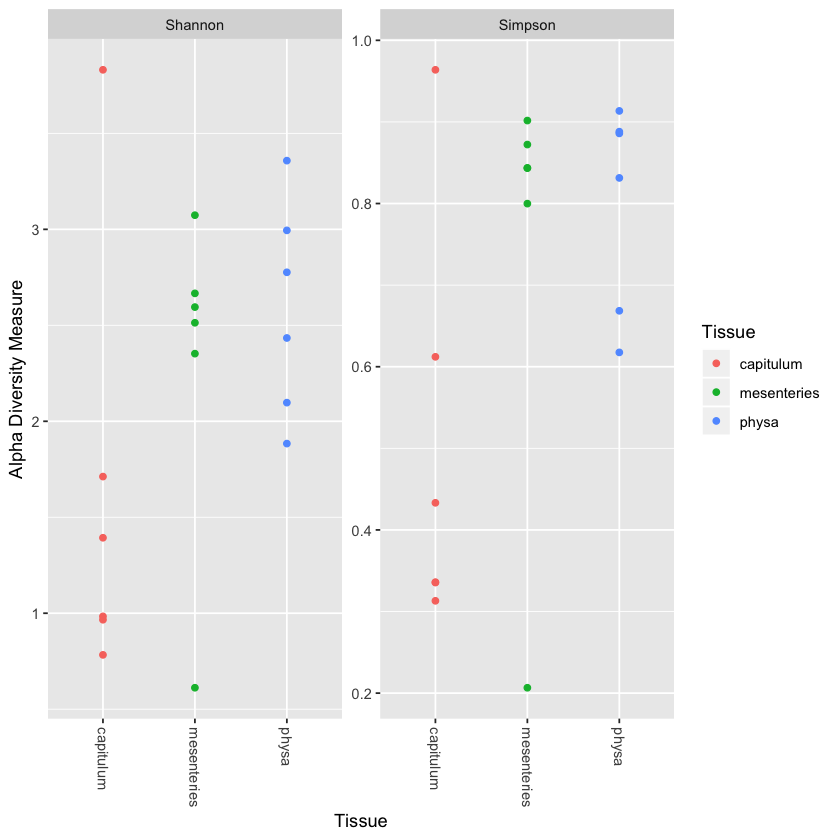

In [694]:
plot_richness(ps_noneg, x="Tissue", color="Tissue",
              measures=c("Simpson", "Shannon"))

In [695]:
richness <- plot_richness(ps_noneg, x="Tissue", color="Tissue",
              measures=c("Simpson", "Shannon"))

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

In [696]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/richness.svg")
plot(richness)
dev.off()

pdf 
  2

In [697]:
jpeg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/richness.jpeg")
plot(richness)
dev.off()

pdf 
  2

In [698]:
install.packages("RColorBrewer")

Installing package into ‘/Users/anthonybonacolta/Downloads/ENTER/envs/qiime2-2019.1/lib/R/library’
(as ‘lib’ is unspecified)


In [699]:
library("RColorBrewer")

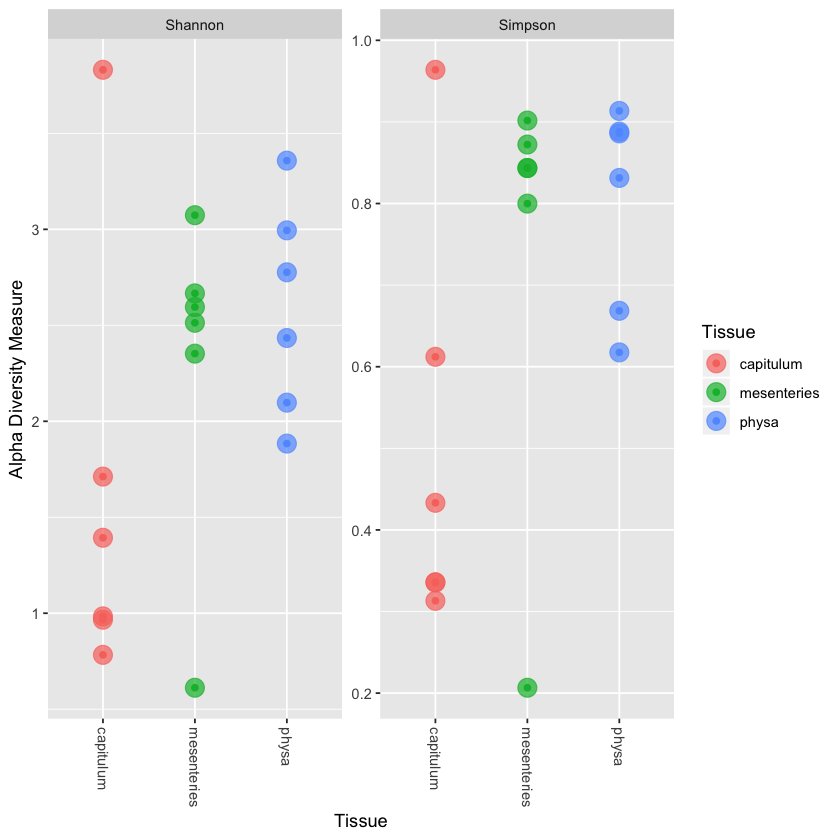

In [702]:
richness + geom_point(size=5, alpha=0.7)

In [703]:
richness_color <- richness + geom_point(size=5, alpha=0.7)

In [704]:
jpeg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/richness_color.jpeg")
plot(richness_color)
dev.off()

pdf 
  2

In [705]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/richness_color.svg")
plot(richness_color)
dev.off()

pdf 
  2

In [708]:
ps.taxa = subset_taxa(ps_noneg, Phylum=="Proteobacteria")
ps.taxa

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 327 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 327 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 327 tips and 326 internal nodes ]

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

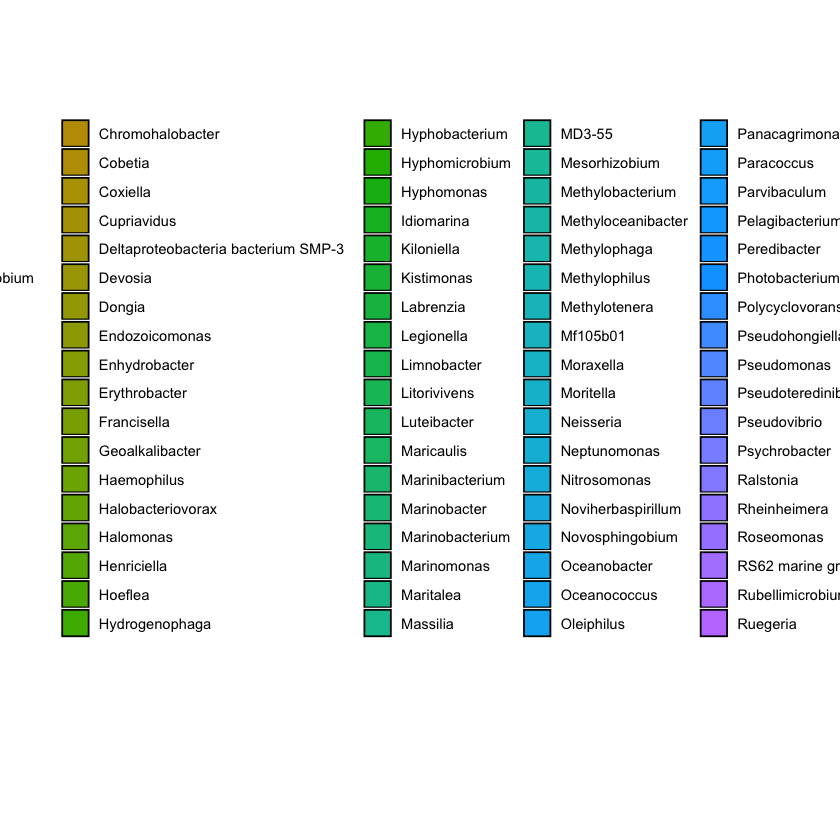

In [730]:
plot_bar(ps.taxa, x="Tissue", fill="Genus")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

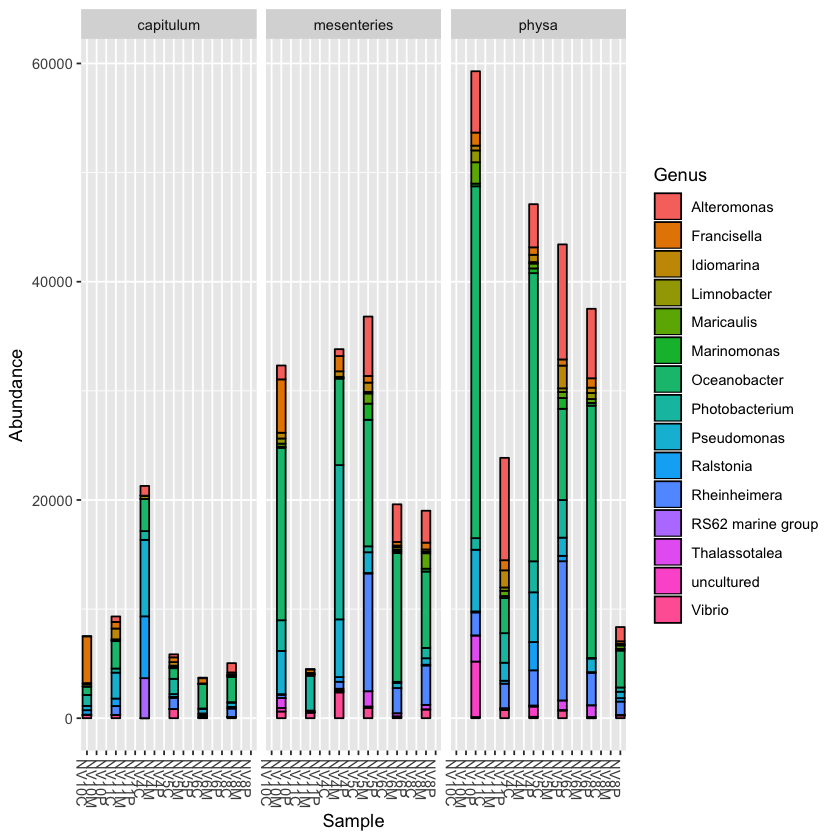

In [729]:
TopNOTUs = names(sort(taxa_sums(ps_genus), TRUE)[1:15])
ent10 = prune_taxa(TopNOTUs, ps_genus)
plot_bar(ent10, fill = "Genus", facet_grid = ~Tissue)

#Why in ABC order? How can I rank according to abundance?

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”Warning message:
“Transformation introduced infinite values in discrete y-axis”

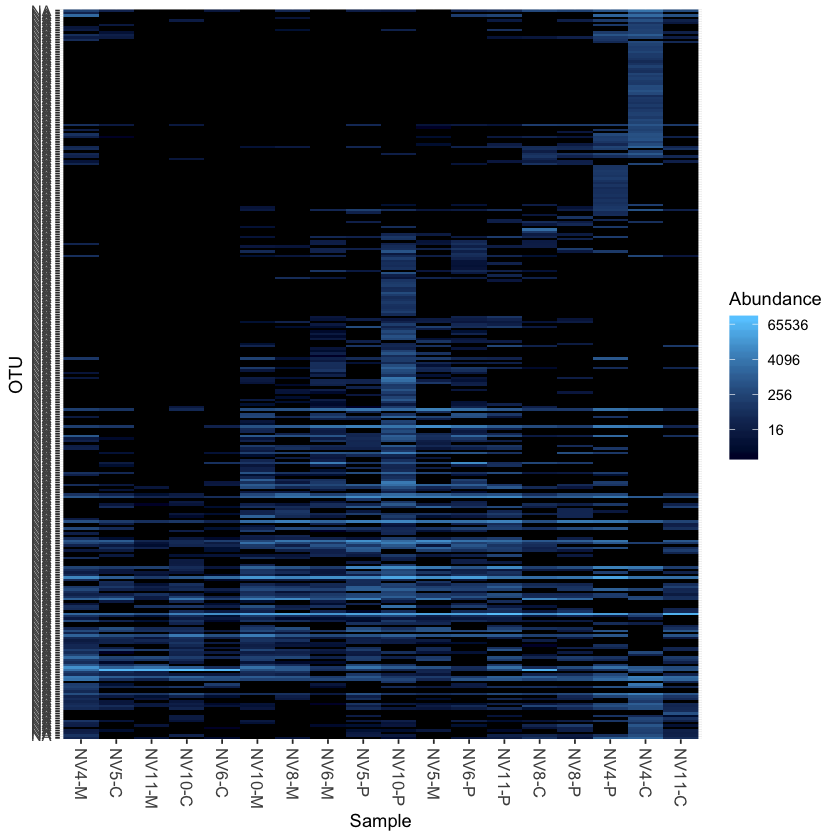

In [732]:
pst <- subset_taxa(ps_noneg, Kingdom=="Bacteria")
pst <- prune_taxa(names(sort(taxa_sums(pst),TRUE)[1:300]), ps_noneg)
plot_heatmap(pst, sample.label="Sample")

In [738]:
ord.PCoA.brayP <- ordinate(ps_noneg, method="PCoA", distance="bray")

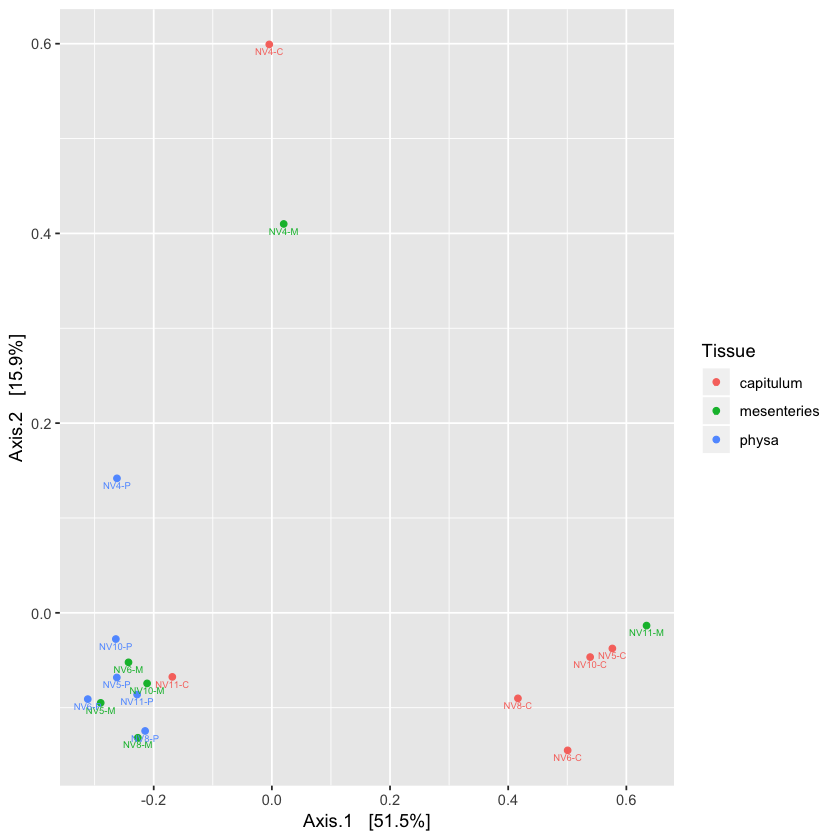

In [739]:
plot_ordination(ps_noneg, ord.PCoA.brayP, color="Tissue", label = "Sample")

In [740]:
BrayPCoA_noneg <- plot_ordination(ps_noneg, ord.PCoA.brayP, color="Tissue", label = "Sample")

In [742]:
png(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/BrayPCoA_noneg.png")
plot(BrayPCoA_noneg)
dev.off()

pdf 
  2

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

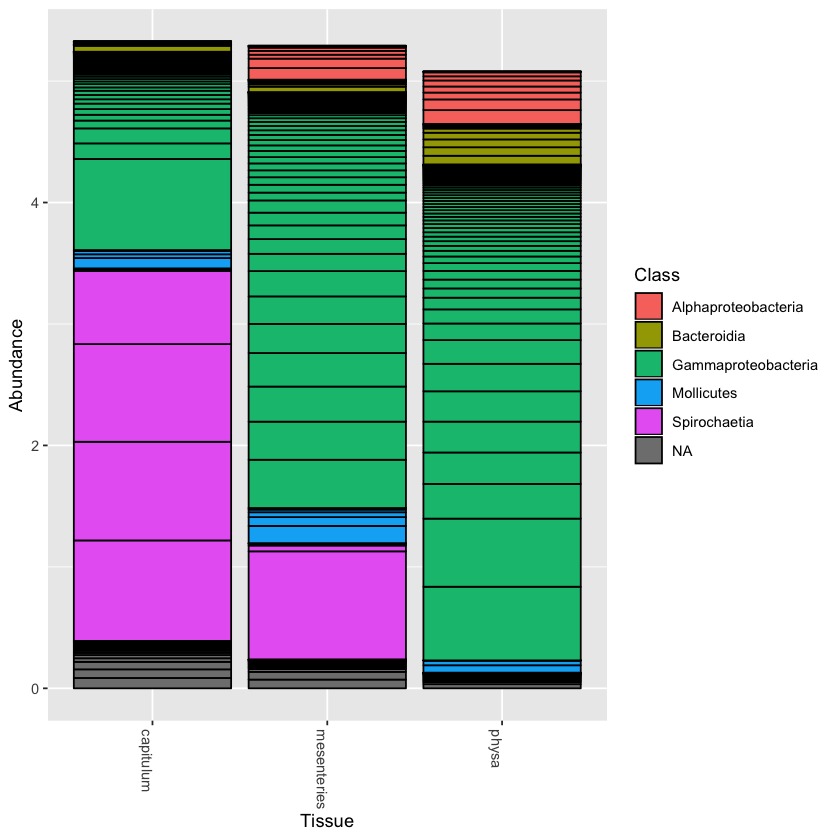

In [753]:
top20 <- names(sort(taxa_sums(ps_noneg), decreasing=TRUE))[1:20]
ps.top20 <- transform_sample_counts(ps_noneg, function(OTU) OTU/sum(OTU))
ps.top20 <- prune_taxa(top20, ps.top20)
plot_bar(ps.top20, x="Tissue", fill="Class")

In [755]:
install.packages("funrar")

Installing package into ‘/Users/anthonybonacolta/Downloads/ENTER/envs/qiime2-2019.1/lib/R/library’
(as ‘lib’ is unspecified)


In [756]:
library(funrar)

In [757]:
install.packages("ade4")

Installing package into ‘/Users/anthonybonacolta/Downloads/ENTER/envs/qiime2-2019.1/lib/R/library’
(as ‘lib’ is unspecified)
Warning message in install.packages("ade4"):
“installation of package ‘ade4’ had non-zero exit status”

In [758]:
library(ade4)

In [759]:
ps_noneg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 620 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 620 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 620 tips and 619 internal nodes ]

In [782]:
SVr  = transform_sample_counts(SV, function(taxa) taxa/sum(taxa))

ERROR: Error in if (taxa_are_rows(physeq)) {: argument is of length zero


In [ ]:
ps_otu = phyloseq(otu_table(SVr, taxa_are_rows=FALSE), 
               sample_data(map), 
               tax_table(tax),
                 phy_tree(tree_file))

In [783]:
top20 <- names(sort(taxa_sums(ps_noneg), decreasing=TRUE))[1:20]
ps.top20 <- transform_sample_counts(ps_noneg, function(OTU) OTU/sum(OTU))

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

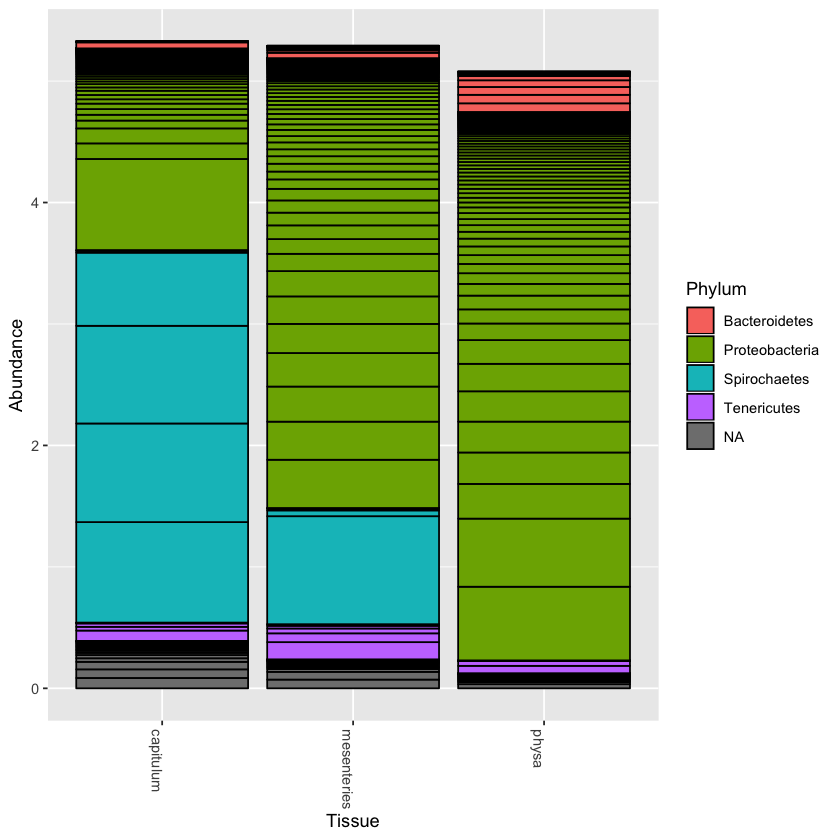

In [788]:
ps.top20 <- prune_taxa(top20, ps.top20)
plot_bar(ps.top20, x="Tissue", fill="Phylum")

In [790]:
Abundance_Phylum <- plot_bar(ps.top20, x="Tissue", fill="Phylum")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

In [792]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Abundance_Phylum.svg")
plot(Abundance_Phylum)
dev.off()

pdf 
  2

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

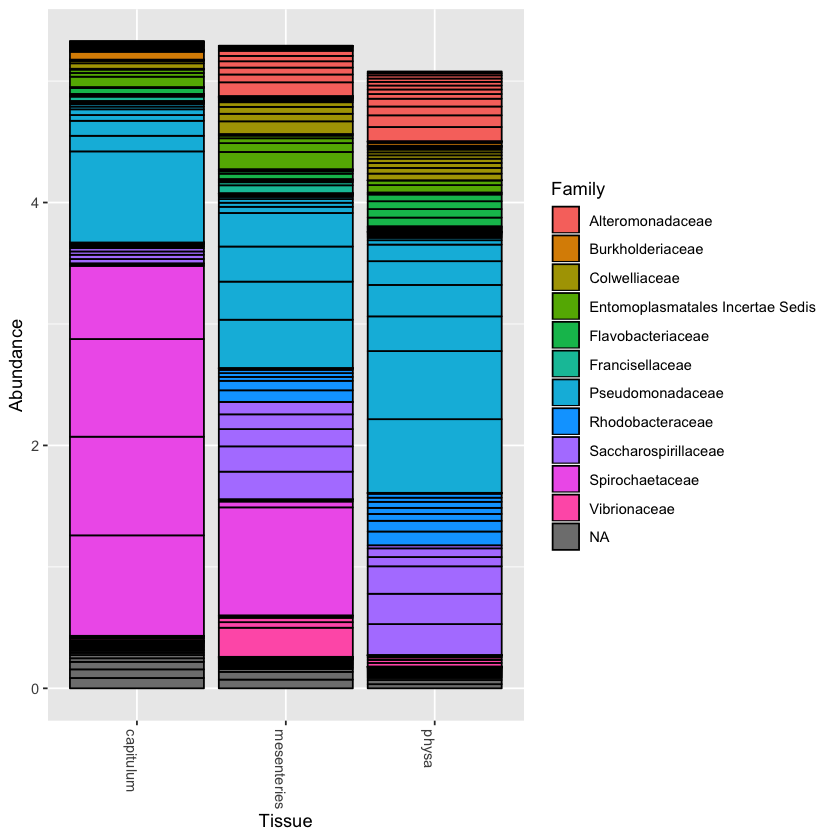

In [793]:
plot_bar(ps.top20, x="Tissue", fill="Family")

In [794]:
Abundance_Family <- plot_bar(ps.top20, x="Tissue", fill="Family")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

In [796]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Abundance_Family.svg")
plot(Abundance_Family)
dev.off()

pdf 
  2

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

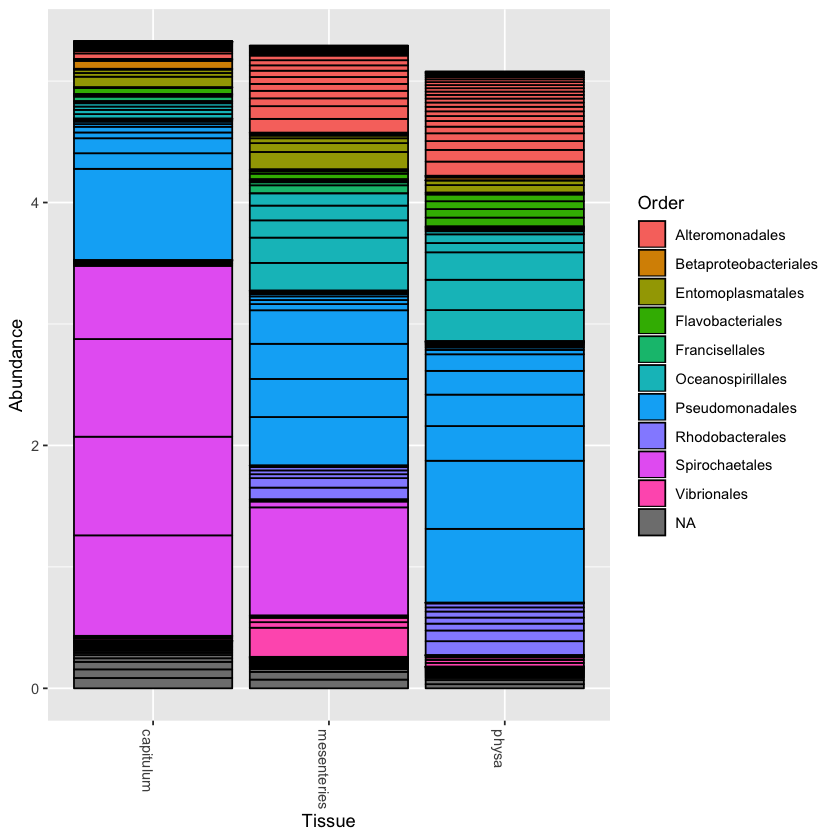

In [797]:
plot_bar(ps.top20, x="Tissue", fill="Order")

In [798]:
Abundance_Order <- plot_bar(ps.top20, x="Tissue", fill="Order")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

In [800]:
png(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Abundance_Order.png")
plot(Abundance_Order)
dev.off()

pdf 
  2

In [801]:
Abundance_Class <- plot_bar(ps.top20, x="Tissue", fill="Class")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

In [803]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Abundance_Class.svg")
plot(Abundance_Class)
dev.off()

pdf 
  2

In [804]:
Abundance_Genus <- plot_bar(ps.top20, x="Tissue", fill="Genus")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(physeq):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

In [805]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Abundance_Genus.svg")
plot(Abundance_Genus)
dev.off()

pdf 
  2

In [806]:
png(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Abundance_Genus.png")
plot(Abundance_Genus)
dev.off()

pdf 
  2

In [808]:
library(vegan)
metadata <- as(sample_data(ps_noneg), "data.frame")

adonis(distance(ps_noneg, method="bray") ~ Tissue,
       data = metadata)
#What does this mean????


Call:
adonis(formula = distance(ps_noneg, method = "bray") ~ Tissue,      data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
Tissue     2    1.1950 0.59752  3.0682 0.29032   0.01 **
Residuals 15    2.9212 0.19475         0.70968          
Total     17    4.1163                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [820]:
map_new <- read.table("/Users/anthonybonacolta/Desktop/Nvec_16s/16S_metadata_tab_phyloseq_new.txt",
                  sep ="\t", row.names = 1, header = TRUE)
head(map_new)

,Sample,Tissue,Species,Individual
NV4M,NV4-M,mesenteries,nematostella_vectensis,1
NV4C,NV4-C,capitulum,nematostella_vectensis,1
NV4P,NV4-P,physa,nematostella_vectensis,1
NV5M,NV5-M,mesenteries,nematostella_vectensis,2
NV5C,NV5-C,capitulum,nematostella_vectensis,2
NV5P,NV5-P,physa,nematostella_vectensis,2


In [822]:
ps_noneg_new = phyloseq(otu_table(SV, taxa_are_rows=FALSE), 
               sample_data(map_new), 
               tax_table(tax),
                 phy_tree(tree_file))
ps_noneg_new

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 620 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 4 sample variables ]
tax_table()   Taxonomy Table:    [ 620 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 620 tips and 619 internal nodes ]

In [823]:
ggplot(ps_noneg_new, aes(x = Individual, y = Abundance, fill = Phylum)) + 
  facet_grid(Tissue~.) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = phylum_colors)

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S4 object with class phyloseq


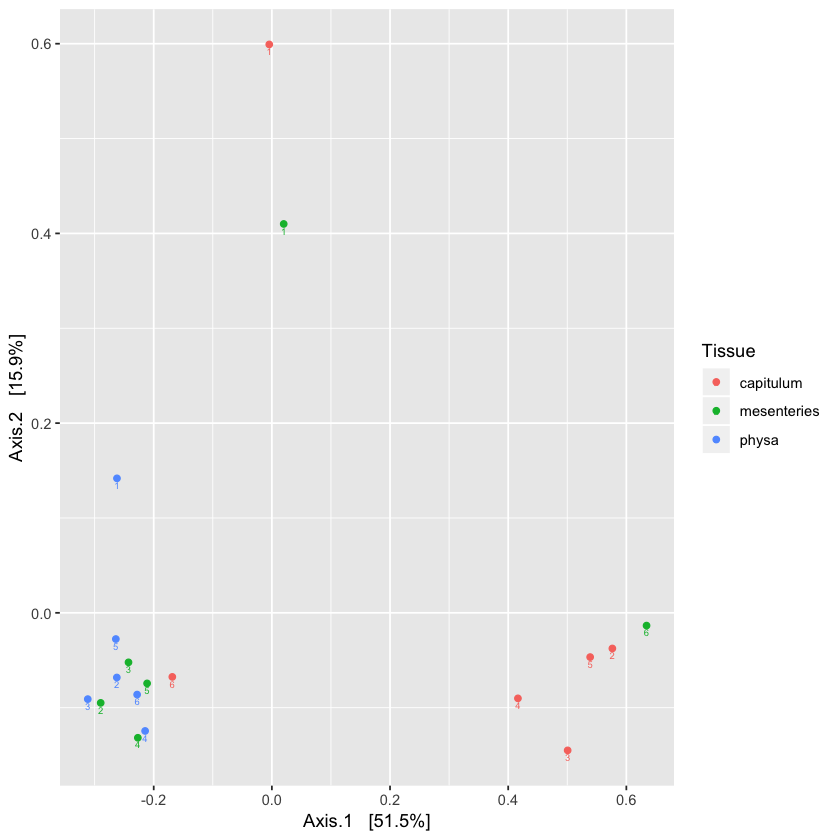

In [826]:
plot_ordination(ps_noneg_new, ord.PCoA.brayP, color="Tissue", label = "Individual")

In [827]:
theme_set(theme_bw())

In [829]:
sharedfile = SV
taxfile = "/Users/anthonybonacolta/Desktop/Nvec_16s/export_Nvec/tax-no-MitoChNvec_ps.txt"
mapfile = "/Users/anthonybonacolta/Desktop/Nvec_16s/16S_metadata_tab_phyloseq_new.txt"

In [831]:
sample_sum_df <- data.frame(sum = sample_sums(ps_noneg_new))

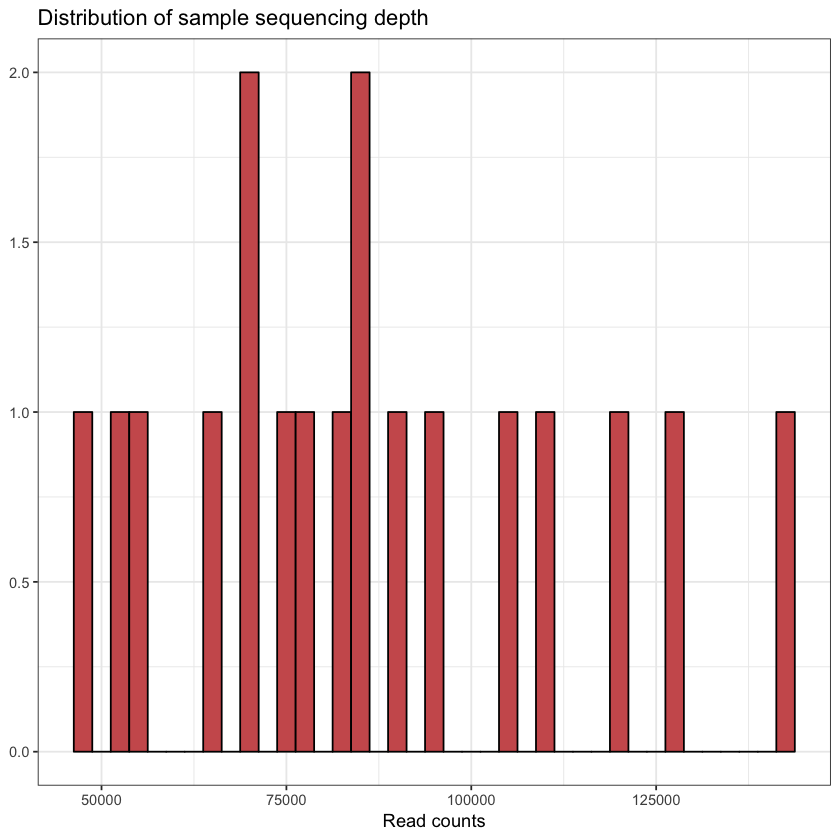

In [833]:
ggplot(sample_sum_df, aes(x = sum)) + 
  geom_histogram(color = "black", fill = "indianred", binwidth = 2500) +
  ggtitle("Distribution of sample sequencing depth") + 
  xlab("Read counts") +
  theme(axis.title.y = element_blank())

In [834]:
smin <- min(sample_sums(ps_noneg_new))
smean <- mean(sample_sums(ps_noneg_new))
smax <- max(sample_sums(ps_noneg_new))

In [835]:
# melt to long format (for ggploting) 
# prune out phyla below 2% in each sample

Nvec_phylum <- ps_noneg_new %>%
  tax_glom(taxrank = "Phylum") %>%                     # agglomerate at phylum level
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt() %>%                                         # Melt to long format
  filter(Abundance > 0.02) %>%                         # Filter out low abundance taxa
  arrange(Phylum)                                      # Sort data frame alphabetically by phylum

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message in psmelt(.):
“The sample variables: 
Species
 have been renamed to: 
sample_Species
to avoid conflicts with taxonomic rank names.”

In [836]:
phylum_colors <- c(
  "#CBD588", "#5F7FC7", "orange","#DA5724", "#508578", "#CD9BCD",
   "#AD6F3B", "#673770","#D14285", "#652926", "#C84248", 
  "#8569D5", "#5E738F","#D1A33D", "#8A7C64", "#599861"
)


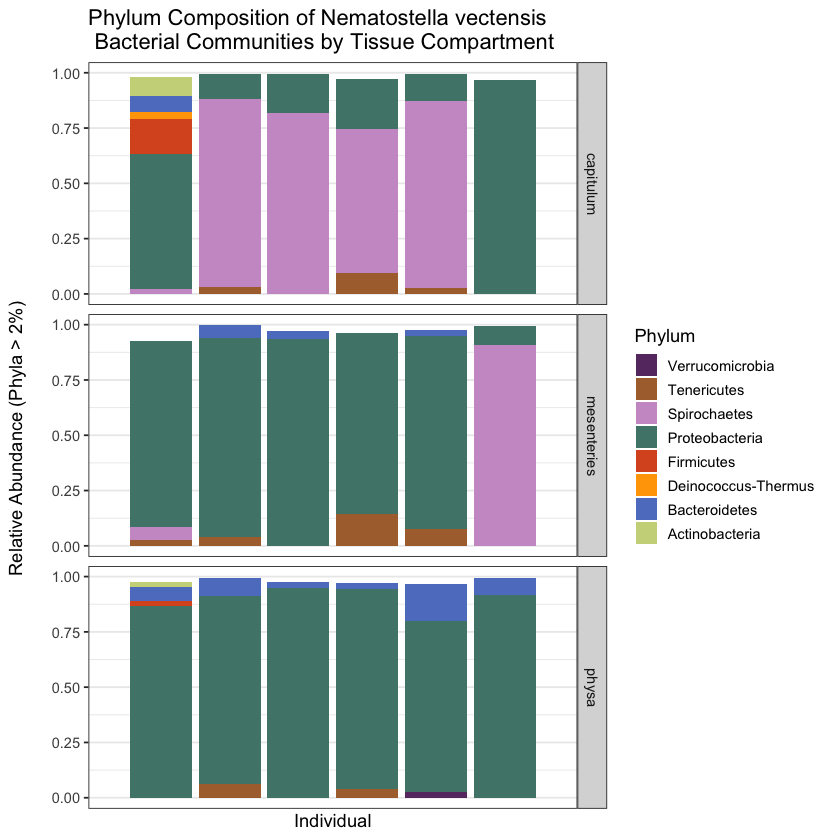

In [847]:
ggplot(Nvec_phylum, aes(x = Individual, y = Abundance, fill = Phylum)) + 
  facet_grid(Tissue~.) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = phylum_colors) +
  scale_x_discrete(
    breaks = c("1", "2", "3", "4", "5", "6"),
    labels = c("1", "2", "3", "4", "5", "6"), 
    drop = FALSE
  ) +
  # Remove x axis title
  xlab("Individual") +
  #
  guides(fill = guide_legend(reverse = TRUE, keywidth = 1, keyheight = 1)) +
  ylab("Relative Abundance (Phyla > 2%) \n") +
  ggtitle("Phylum Composition of Nematostella vectensis \n Bacterial Communities by Tissue Compartment")

In [848]:
Phylum_comp <- ggplot(Nvec_phylum, aes(x = Individual, y = Abundance, fill = Phylum)) + 
  facet_grid(Tissue~.) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = phylum_colors) +
  scale_x_discrete(
    breaks = c("1", "2", "3", "4", "5", "6"),
    labels = c("1", "2", "3", "4", "5", "6"), 
    drop = FALSE
  ) +
  # Remove x axis title
  xlab("Individual") +
  #
  guides(fill = guide_legend(reverse = TRUE, keywidth = 1, keyheight = 1)) +
  ylab("Relative Abundance (Phyla > 2%) \n") +
  ggtitle("Phylum Composition of Nematostella vectensis \n Bacterial Communities by Tissue Compartment")

In [849]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Phylum_comp.svg")
plot(Phylum_comp)
dev.off()

quartz_off_screen 
                2

In [850]:
png(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/Phylum_comp.png")
plot(Phylum_comp)
dev.off()

quartz_off_screen 
                2

In [852]:
library(ggplot2)
library(vegan)
library(dplyr)
library(scales)
library(grid)
library(reshape2)
library(phyloseq)

In [854]:
scale_reads <- function(ps_noneg_new, n = min(sample_sums(ps_noneg_new)), round = "floor")

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: scale_reads <- function(ps_noneg_new, n = min(sample_sums(ps_noneg_new)), round = "floor")
   ^


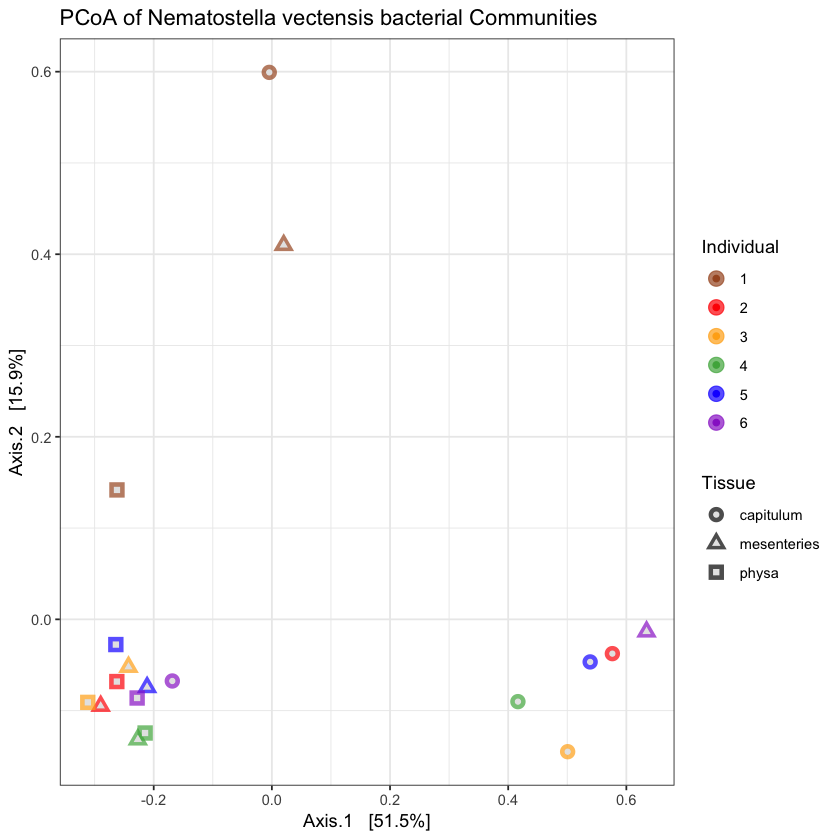

In [858]:
# Fix month levels in sample_data
sample_data(ps_noneg_new)$Individual <- factor(
  sample_data(ps_noneg_new)$Individual, 
  levels = c("1", "2", "3", "4", "5", "6")
)


# Ordinate
Nvec_pcoa <- ordinate(
  physeq = ps_noneg_new, 
  method = "PCoA", 
  distance = "bray"
)

# Plot 
plot_ordination(
  physeq = ps_noneg_new,
  ordination = Nvec_pcoa,
  color = "Individual",
  shape = "Tissue",
  title = "PCoA of Nematostella vectensis bacterial Communities"
) + 
  scale_color_manual(values = c("#a65628", "red", "#ffae19",
    "#4daf4a", "#1919ff", "darkorchid3", "magenta")
  ) +
  geom_point(aes(color = Individual), alpha = 0.7, size = 4) +
  geom_point(colour = "grey90", size = 1.5) 

In [859]:
BrayPCoA_NVec <- plot_ordination(
  physeq = ps_noneg_new,
  ordination = Nvec_pcoa,
  color = "Individual",
  shape = "Tissue",
  title = "PCoA of Nematostella vectensis bacterial Communities"
) + 
  scale_color_manual(values = c("#a65628", "red", "#ffae19",
    "#4daf4a", "#1919ff", "darkorchid3", "magenta")
  ) +
  geom_point(aes(color = Individual), alpha = 0.7, size = 4) +
  geom_point(colour = "grey90", size = 1.5) 

In [860]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/BrayPCoA_NVec.svg")
plot(BrayPCoA_NVec)
dev.off()

quartz_off_screen 
                2

In [861]:
png(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/BrayPCoA_NVec.png")
plot(BrayPCoA_NVec)
dev.off()

quartz_off_screen 
                2

In [862]:
set.seed(1)

# Ordinate
Nvec_nmds <- ordinate(
  physeq = ps_noneg_new, 
  method = "NMDS", 
  distance = "bray"
)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1299127 
Run 1 stress 0.20592 
Run 2 stress 0.1680079 
Run 3 stress 0.187168 
Run 4 stress 0.1285293 
... New best solution
... Procrustes: rmse 0.04618367  max resid 0.1194611 
Run 5 stress 0.1862309 
Run 6 stress 0.1680087 
Run 7 stress 0.1285293 
... New best solution
... Procrustes: rmse 6.615081e-05  max resid 0.0001560191 
... Similar to previous best
Run 8 stress 0.185974 
Run 9 stress 0.1862313 
Run 10 stress 0.1285293 
... New best solution
... Procrustes: rmse 2.714605e-06  max resid 5.408854e-06 
... Similar to previous best
Run 11 stress 0.1832325 
Run 12 stress 0.1299127 
Run 13 stress 0.1680077 
Run 14 stress 0.185974 
Run 15 stress 0.1274643 
... New best solution
... Procrustes: rmse 0.02209167  max resid 0.08480393 
Run 16 stress 0.1299127 
Run 17 stress 0.2078191 
Run 18 stress 0.1285293 
Run 19 stress 0.1274645 
... Procrustes: rmse 0.0001937359  max resid 0.0005387367 
... Similar to previous

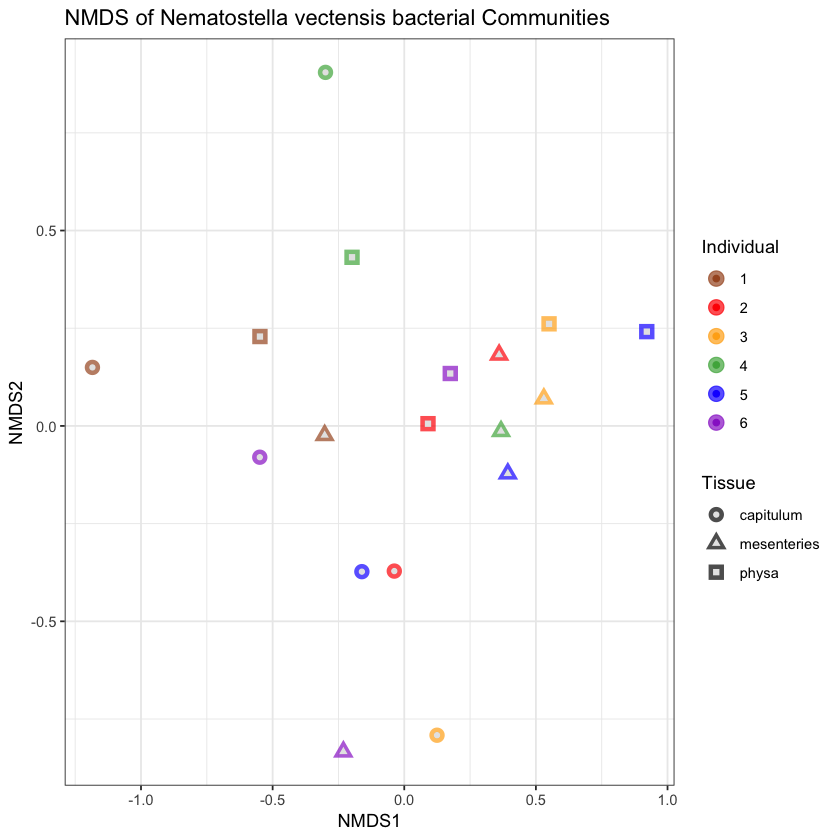

In [863]:
plot_ordination(
  physeq = ps_noneg_new,
  ordination = Nvec_nmds,
  color = "Individual",
  shape = "Tissue",
  title = "NMDS of Nematostella vectensis bacterial Communities"
) + 
  scale_color_manual(values = c("#a65628", "red", "#ffae19",
    "#4daf4a", "#1919ff", "darkorchid3", "magenta")
  ) +
  geom_point(aes(color = Individual), alpha = 0.7, size = 4) +
  geom_point(colour = "grey90", size = 1.5) 

In [864]:
NMDS__Nvec <- plot_ordination(
  physeq = ps_noneg_new,
  ordination = Nvec_nmds,
  color = "Individual",
  shape = "Tissue",
  title = "NMDS of Nematostella vectensis bacterial Communities"
) + 
  scale_color_manual(values = c("#a65628", "red", "#ffae19",
    "#4daf4a", "#1919ff", "darkorchid3", "magenta")
  ) +
  geom_point(aes(color = Individual), alpha = 0.7, size = 4) +
  geom_point(colour = "grey90", size = 1.5) 

In [865]:
png(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/NMDS__Nvec.png")
plot(NMDS__Nvec)
dev.off()

quartz_off_screen 
                2

In [866]:
svg(filename="/Users/anthonybonacolta/Desktop/Nvec_16s/Graphs/NMDS__Nvec.svg")
plot(NMDS__Nvec)
dev.off()

quartz_off_screen 
                2

In [867]:
set.seed(1)

# Calculate bray curtis distance matrix
Nvec_bray <- phyloseq::distance(ps_noneg_new, method = "bray")

# make a data frame from the sample_data
sampledf <- data.frame(sample_data(ps_noneg_new))

# Adonis test
adonis(Nvec_bray ~ Tissue, data = sampledf)


#Significant!!


Call:
adonis(formula = Nvec_bray ~ Tissue, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
Tissue     2    1.1950 0.59752  3.0682 0.29032  0.007 **
Residuals 15    2.9212 0.19475         0.70968          
Total     17    4.1163                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [868]:
beta <- betadisper(Nvec_bray, sampledf$Tissue)
permutest(beta)

#Significant??


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     2 0.03023 0.015117 0.2702    999  0.766
Residuals 15 0.83930 0.055953                     